# New York City Crash Report 
## Group E (NYC Crashers)

In [42]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import LinearRegression
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
import requests
import plotly.express as px
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error

# Reading and Assessment of Data 

In [43]:
df = pd.read_csv('Motor_Vehicle_Collisions_-_Crashes.csv', encoding='latin1')
df.info()

C:\Users\jmitc\AppData\Local\Temp\ipykernel_24992\3975778814.py:1: DtypeWarning: Columns (3) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('Motor_Vehicle_Collisions_-_Crashes.csv', encoding='latin1')


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2070594 entries, 0 to 2070593
Data columns (total 29 columns):
 #   Column                         Dtype  
---  ------                         -----  
 0   CRASH DATE                     object 
 1   CRASH TIME                     object 
 2   BOROUGH                        object 
 3   ZIP CODE                       object 
 4   LATITUDE                       float64
 5   LONGITUDE                      float64
 6   LOCATION                       object 
 7   ON STREET NAME                 object 
 8   CROSS STREET NAME              object 
 9   OFF STREET NAME                object 
 10  NUMBER OF PERSONS INJURED      float64
 11  NUMBER OF PERSONS KILLED       float64
 12  NUMBER OF PEDESTRIANS INJURED  int64  
 13  NUMBER OF PEDESTRIANS KILLED   int64  
 14  NUMBER OF CYCLIST INJURED      int64  
 15  NUMBER OF CYCLIST KILLED       int64  
 16  NUMBER OF MOTORIST INJURED     int64  
 17  NUMBER OF MOTORIST KILLED      int64  
 18  CO

In [44]:
df.describe()

,LATITUDE,LONGITUDE,NUMBER OF PERSONS INJURED,NUMBER OF PERSONS KILLED,NUMBER OF PEDESTRIANS INJURED,NUMBER OF PEDESTRIANS KILLED,NUMBER OF CYCLIST INJURED,NUMBER OF CYCLIST KILLED,NUMBER OF MOTORIST INJURED,NUMBER OF MOTORIST KILLED,COLLISION_ID
count,1.837243e+06,1.837243e+06,2.070576e+06,2.070563e+06,2.070594e+06,2.070594e+06,2.070594e+06,2.070594e+06,2.070594e+06,2.070594e+06,2.070594e+06
mean,4.062766e+01,-7.375207e+01,3.092516e-01,1.489933e-03,5.644081e-02,7.394014e-04,2.675319e-02,1.144599e-04,2.224569e-01,6.128676e-04,3.156009e+06
std,1.981063e+00,3.724374e+00,6.995985e-01,4.071506e-02,2.438824e-01,2.765745e-02,1.633632e-01,1.074303e-02,6.607131e-01,2.709606e-02,1.505039e+06
min,0.000000e+00,-2.013600e+02,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,2.200000e+01
25%,4.066782e+01,-7.397485e+01,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,3.153768e+06
50%,4.072084e+01,-7.392727e+01,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,3.671536e+06
75%,4.076960e+01,-7.386673e+01,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,4.189428e+06
max,4.334444e+01,0.000000e+00,4.300000e+01,8.000000e+00,2.700000e+01,6.000000e+00,4.000000e+00,2.000000e+00,4.300000e+01,5.000000e+00,4.707442e+06


In [45]:
df.head(10).T

,0,1,2,3,4,5,6,7,8,9
CRASH DATE,09/11/2021,03/26/2022,06/29/2022,09/11/2021,12/14/2021,04/14/2021,12/14/2021,12/14/2021,12/14/2021,12/14/2021
CRASH TIME,2:39,11:45,6:55,9:35,8:13,12:47,17:05,8:17,21:10,14:58
BOROUGH,NaN,NaN,NaN,BROOKLYN,BROOKLYN,NaN,NaN,BRONX,BROOKLYN,MANHATTAN
ZIP CODE,NaN,NaN,NaN,11208.0,11233.0,NaN,NaN,10475.0,11207.0,10017.0
LATITUDE,NaN,NaN,NaN,40.667202,40.683304,NaN,40.709183,40.86816,40.67172,40.75144
LONGITUDE,NaN,NaN,NaN,-73.8665,-73.917274,NaN,-73.956825,-73.83148,-73.8971,-73.97397
LOCATION,NaN,NaN,NaN,"(40.667202, -73.8665)","(40.683304, -73.917274)",NaN,"(40.709183, -73.956825)","(40.86816, -73.83148)","(40.67172, -73.8971)","(40.75144, -73.97397)"
ON STREET NAME,WHITESTONE EXPRESSWAY,QUEENSBORO BRIDGE UPPER,THROGS NECK BRIDGE,NaN,SARATOGA AVENUE,MAJOR DEEGAN EXPRESSWAY RAMP,BROOKLYN QUEENS EXPRESSWAY,NaN,NaN,3 AVENUE
CROSS STREET NAME,20 AVENUE,NaN,NaN,NaN,DECATUR STREET,NaN,NaN,NaN,NaN,EAST 43 STREET
OFF STREET NAME,NaN,NaN,NaN,1211 LORING AVENUE,NaN,NaN,NaN,344 BAYCHESTER AVENUE,2047 PITKIN AVENUE,NaN


* Assessment of the data's top values

In [46]:
df["CONTRIBUTING FACTOR VEHICLE 1"].value_counts()

CONTRIBUTING FACTOR VEHICLE 1
Unspecified                       705582
Driver Inattention/Distraction    414046
Failure to Yield Right-of-Way     122943
Following Too Closely             110620
Backing Unsafely                   76582
                                   ...  
Windshield Inadequate                 80
Cell Phone (hand-held)                79
Texting                               51
Listening/Using Headphones            24
1                                     10
Name: count, Length: 61, dtype: int64

In [47]:
for i in range(1,6):
    df_cfv = df["CONTRIBUTING FACTOR VEHICLE "+str(i)].value_counts()
    print(f"===================== Contributing factor {i} =============================")
    print(df_cfv)

===================== Contributing factor 1 =============================
CONTRIBUTING FACTOR VEHICLE 1
Unspecified                       705582
Driver Inattention/Distraction    414046
Failure to Yield Right-of-Way     122943
Following Too Closely             110620
Backing Unsafely                   76582
                                   ...  
Windshield Inadequate                 80
Cell Phone (hand-held)                79
Texting                               51
Listening/Using Headphones            24
1                                     10
Name: count, Length: 61, dtype: int64
===================== Contributing factor 2 =============================
CONTRIBUTING FACTOR VEHICLE 2
Unspecified                       1473382
Driver Inattention/Distraction      94041
Other Vehicular                     31999
Following Too Closely               18977
Failure to Yield Right-of-Way       17088
                                   ...   
Eating or Drinking                     11
Listening

In [48]:
df.isnull().sum()

CRASH DATE                             0
CRASH TIME                             0
BOROUGH                           644237
ZIP CODE                          644487
LATITUDE                          233351
LONGITUDE                         233351
LOCATION                          233351
ON STREET NAME                    439198
CROSS STREET NAME                 781957
OFF STREET NAME                  1723769
NUMBER OF PERSONS INJURED             18
NUMBER OF PERSONS KILLED              31
NUMBER OF PEDESTRIANS INJURED          0
NUMBER OF PEDESTRIANS KILLED           0
NUMBER OF CYCLIST INJURED              0
NUMBER OF CYCLIST KILLED               0
NUMBER OF MOTORIST INJURED             0
NUMBER OF MOTORIST KILLED              0
CONTRIBUTING FACTOR VEHICLE 1       6769
CONTRIBUTING FACTOR VEHICLE 2     320567
CONTRIBUTING FACTOR VEHICLE 3    1922727
CONTRIBUTING FACTOR VEHICLE 4    2037228
CONTRIBUTING FACTOR VEHICLE 5    2061565
COLLISION_ID                           0
VEHICLE TYPE COD

Seeeing as Columns CONTRIBUTING FACTOR VEHICLE 3-5 and VEHICLE TYPE CODE 3-5 are columns that are mostly empty we can drop these columns and focus on the main data in order to furhter our analysis.

In [49]:
df.drop(['CONTRIBUTING FACTOR VEHICLE 3','CONTRIBUTING FACTOR VEHICLE 4','CONTRIBUTING FACTOR VEHICLE 5'],axis=1,inplace=True)
df.drop(['VEHICLE TYPE CODE 3','VEHICLE TYPE CODE 4','VEHICLE TYPE CODE 5'],axis=1,inplace=True)

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2070594 entries, 0 to 2070593
Data columns (total 23 columns):
 #   Column                         Dtype  
---  ------                         -----  
 0   CRASH DATE                     object 
 1   CRASH TIME                     object 
 2   BOROUGH                        object 
 3   ZIP CODE                       object 
 4   LATITUDE                       float64
 5   LONGITUDE                      float64
 6   LOCATION                       object 
 7   ON STREET NAME                 object 
 8   CROSS STREET NAME              object 
 9   OFF STREET NAME                object 
 10  NUMBER OF PERSONS INJURED      float64
 11  NUMBER OF PERSONS KILLED       float64
 12  NUMBER OF PEDESTRIANS INJURED  int64  
 13  NUMBER OF PEDESTRIANS KILLED   int64  
 14  NUMBER OF CYCLIST INJURED      int64  
 15  NUMBER OF CYCLIST KILLED       int64  
 16  NUMBER OF MOTORIST INJURED     int64  
 17  NUMBER OF MOTORIST KILLED      int64  
 18  CO

In [50]:
df['CRASH DATE'] = pd.to_datetime(df['CRASH DATE'])

In [51]:
v_type1 = df['VEHICLE TYPE CODE 1'].value_counts()

In [52]:
v_type2 = df['VEHICLE TYPE CODE 2'].value_counts()

([0, 1, 2, 3, 4, 5, 6, 7, 8, 9],
 [Text(0, 0, 'Sedan'),
  Text(1, 0, 'Station Wagon/Sport Utility Vehicle'),
  Text(2, 0, 'PASSENGER VEHICLE'),
  Text(3, 0, 'SPORT UTILITY / STATION WAGON'),
  Text(4, 0, 'Taxi'),
  Text(5, 0, '4 dr sedan'),
  Text(6, 0, 'Pick-up Truck'),
  Text(7, 0, 'TAXI'),
  Text(8, 0, 'VAN'),
  Text(9, 0, 'Box Truck')])

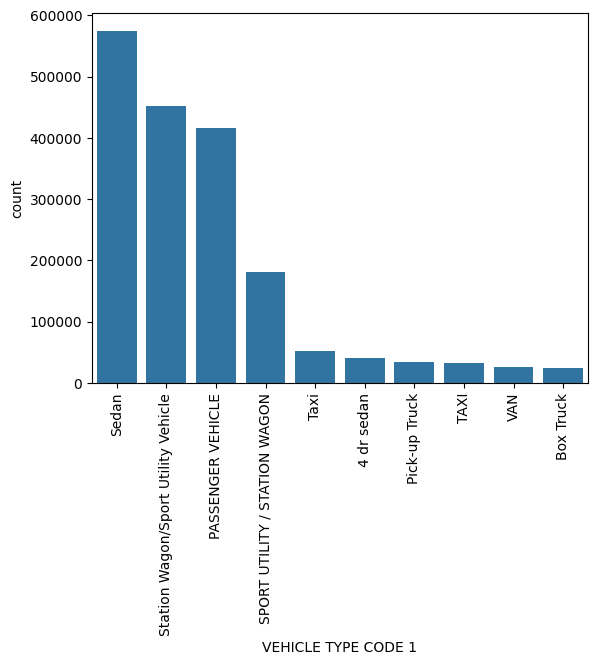

In [53]:
sns.barplot(v_type1[0:10])
plt.xticks(rotation=90)


([0, 1, 2, 3, 4, 5, 6, 7, 8, 9],
 [Text(0, 0, 'Sedan'),
  Text(1, 0, 'Station Wagon/Sport Utility Vehicle'),
  Text(2, 0, 'PASSENGER VEHICLE'),
  Text(3, 0, 'SPORT UTILITY / STATION WAGON'),
  Text(4, 0, 'UNKNOWN'),
  Text(5, 0, 'Taxi'),
  Text(6, 0, 'Bike'),
  Text(7, 0, 'Pick-up Truck'),
  Text(8, 0, '4 dr sedan'),
  Text(9, 0, 'Box Truck')])

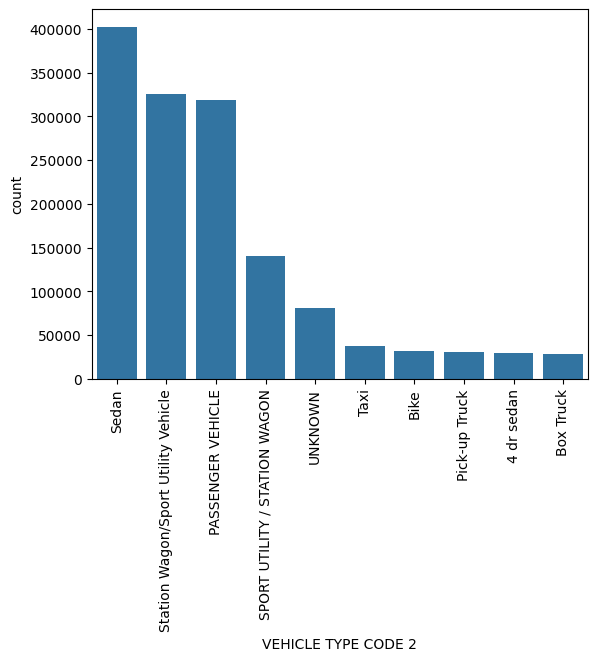

In [54]:
sns.barplot(v_type2[0:10])
plt.xticks(rotation=90)

The API application that is proposed will most likely be built using a K-Means clustering algorithm so in this case the best feature to use would be the longitude and latitude features. However some coordinates are missing so if the street names are provided for those missing rows, the values can be obtained using the OpenStreetMap Nominatim  API.

In [55]:
df_no_locs = df[df['LOCATION'].isna()]
df_street_names = df_no_locs[df_no_locs['ON STREET NAME'].notna()].shape

From the column above there are 177173 columns where the street name is known but not the location so we can input this data into the OpenStreetMap Nominatim API and get the approximate coordinates of the accidents. Since the dataset is soo large the other rows where the data is not known can simply be dropped as it may not have a ssignificant effect on the outcome of the analysis.

In [56]:
'''
addresses = list(df_street_names['ON STREET NAME'])
locations = []
for address in addresses:
    base_url = 'https://nominatim.openstreetmap.org/search'
    params = {'q': address, 'format': 'json'}
    response = requests.get(base_url, params=params)
    data = response.json()

    if data:
        lat = float(data[0]['lat'])
        lon = float(data[0]['lon'])
        locations = [lat,lon]
    else:
        print("Error receiving coordinates")
'''

'\naddresses = list(df_street_names[\'ON STREET NAME\'])\nlocations = []\nfor address in addresses:\n    base_url = \'https://nominatim.openstreetmap.org/search\'\n    params = {\'q\': address, \'format\': \'json\'}\n    response = requests.get(base_url, params=params)\n    data = response.json()\n\n    if data:\n        lat = float(data[0][\'lat\'])\n        lon = float(data[0][\'lon\'])\n        locations = [lat,lon]\n    else:\n        print("Error receiving coordinates")\n'

In [57]:
df['NUM PERSONS AFFECTED'] = df['NUMBER OF PERSONS INJURED'] + df['NUMBER OF PERSONS KILLED']

In [58]:
reg_df = df[['CRASH DATE', 'CRASH TIME', 'BOROUGH', 'NUMBER OF PERSONS INJURED', 'NUMBER OF PERSONS KILLED','NUM PERSONS AFFECTED','LOCATION','LONGITUDE','LATITUDE']]
reg_df.head()

,CRASH DATE,CRASH TIME,BOROUGH,NUMBER OF PERSONS INJURED,NUMBER OF PERSONS KILLED,NUM PERSONS AFFECTED,LOCATION,LONGITUDE,LATITUDE
0,2021-09-11,2:39,NaN,2.0,0.0,2.0,NaN,NaN,NaN
1,2022-03-26,11:45,NaN,1.0,0.0,1.0,NaN,NaN,NaN
2,2022-06-29,6:55,NaN,0.0,0.0,0.0,NaN,NaN,NaN
3,2021-09-11,9:35,BROOKLYN,0.0,0.0,0.0,"(40.667202, -73.8665)",-73.866500,40.667202
4,2021-12-14,8:13,BROOKLYN,0.0,0.0,0.0,"(40.683304, -73.917274)",-73.917274,40.683304


In [59]:
reg_df['BOROUGH'].unique()

array([nan, 'BROOKLYN', 'BRONX', 'MANHATTAN', 'QUEENS', 'STATEN ISLAND'],
      dtype=object)

In [60]:
reg_df['Month'] = reg_df['CRASH DATE'].dt.month
reg_df['Year'] = reg_df['CRASH DATE'].dt.year
reg_df['month_year'] = reg_df['CRASH DATE'].dt.to_period('M')
reg_df['month_year'] = reg_df['month_year'].astype(str)
reg_df['month_year'] = pd.to_datetime(reg_df['month_year'])

C:\Users\jmitc\AppData\Local\Temp\ipykernel_24992\2203625550.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  reg_df['Month'] = reg_df['CRASH DATE'].dt.month
C:\Users\jmitc\AppData\Local\Temp\ipykernel_24992\2203625550.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  reg_df['Year'] = reg_df['CRASH DATE'].dt.year
C:\Users\jmitc\AppData\Local\Temp\ipykernel_24992\2203625550.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_in

In [61]:
reg_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2070594 entries, 0 to 2070593
Data columns (total 12 columns):
 #   Column                     Dtype         
---  ------                     -----         
 0   CRASH DATE                 datetime64[ns]
 1   CRASH TIME                 object        
 2   BOROUGH                    object        
 3   NUMBER OF PERSONS INJURED  float64       
 4   NUMBER OF PERSONS KILLED   float64       
 5   NUM PERSONS AFFECTED       float64       
 6   LOCATION                   object        
 7   LONGITUDE                  float64       
 8   LATITUDE                   float64       
 9   Month                      int32         
 10  Year                       int32         
 11  month_year                 datetime64[ns]
dtypes: datetime64[ns](2), float64(5), int32(2), object(3)
memory usage: 173.8+ MB


In [62]:
reg_df_2 = reg_df[['NUMBER OF PERSONS INJURED','NUMBER OF PERSONS KILLED','NUM PERSONS AFFECTED','month_year']]
reg_df_2 = reg_df_2.groupby('month_year').sum()
reg_df_2.head()

,NUMBER OF PERSONS INJURED,NUMBER OF PERSONS KILLED,NUM PERSONS AFFECTED
month_year,,,
2012-07-01,4855.0,22.0,4877.0
2012-08-01,4751.0,27.0,4778.0
2012-09-01,4689.0,26.0,4715.0
2012-10-01,4572.0,21.0,4593.0
2012-11-01,3995.0,14.0,4009.0


In [63]:
reg_df_2['num_injured(thousands)'] = reg_df_2['NUMBER OF PERSONS INJURED']/1000
reg_df_2['num_killed(tens)'] = reg_df_2['NUMBER OF PERSONS KILLED']/10
reg_df_2['num_affected(thousands)'] = reg_df_2['NUM PERSONS AFFECTED']/1000
reg_df_2 = reg_df_2.drop(['NUMBER OF PERSONS INJURED','NUMBER OF PERSONS KILLED','NUM PERSONS AFFECTED'],axis=1)
reg_df_2.head()

,num_injured(thousands),num_killed(tens),num_affected(thousands)
month_year,,,
2012-07-01,4.855,2.2,4.877
2012-08-01,4.751,2.7,4.778
2012-09-01,4.689,2.6,4.715
2012-10-01,4.572,2.1,4.593
2012-11-01,3.995,1.4,4.009


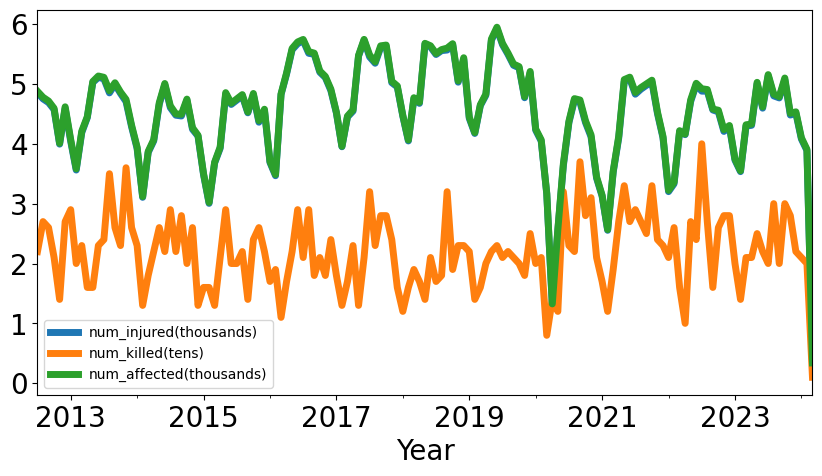

In [64]:
reg_df_2.plot(figsize=(10,5), linewidth=5, fontsize=20)
plt.xlabel('Year', fontsize=20);

Text(0.5, 0, 'Year')

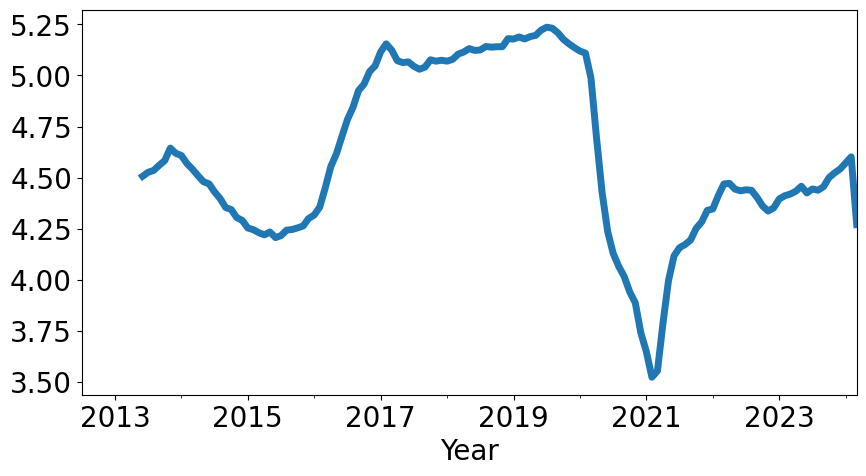

In [65]:
affected = reg_df_2['num_affected(thousands)'].copy()
affected.rolling(12).mean().plot(figsize=(10,5), linewidth=5, fontsize=20)
plt.xlabel('Year', fontsize=20)

Text(0.5, 0, 'Year')

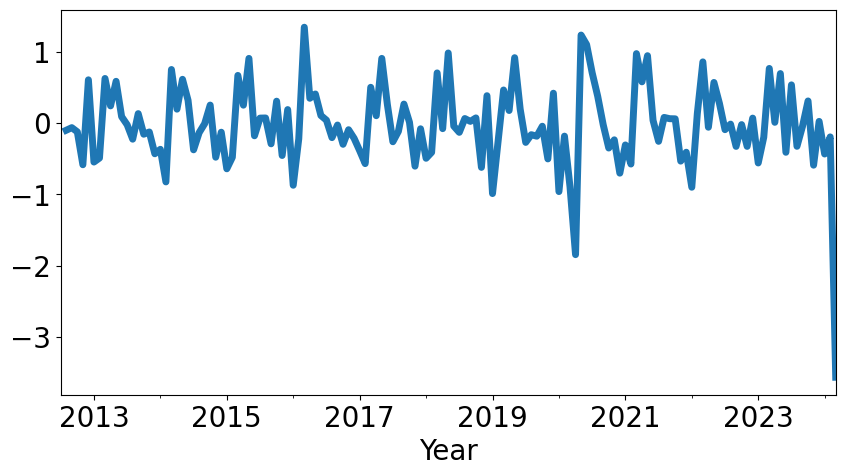

In [66]:
affected.diff().plot(figsize=(10,5), linewidth=5, fontsize=20)
plt.xlabel('Year', fontsize=20)

In [67]:
affected = reg_df_2[['num_affected(thousands)']].copy()
#affected['num_affected(thousands)'] = reg_df_2['num_affected(thousands)'].astype(np.float64)

In [68]:
affected

,num_affected(thousands)
month_year,
2012-07-01,4.877
2012-08-01,4.778
2012-09-01,4.715
2012-10-01,4.593
2012-11-01,4.009
...,...
2023-11-01,4.509
2023-12-01,4.534
2024-01-01,4.101


In [69]:
train = affected[affected.index.year < 2023]
test = affected[affected.index.year == 2023]

Naive Approach

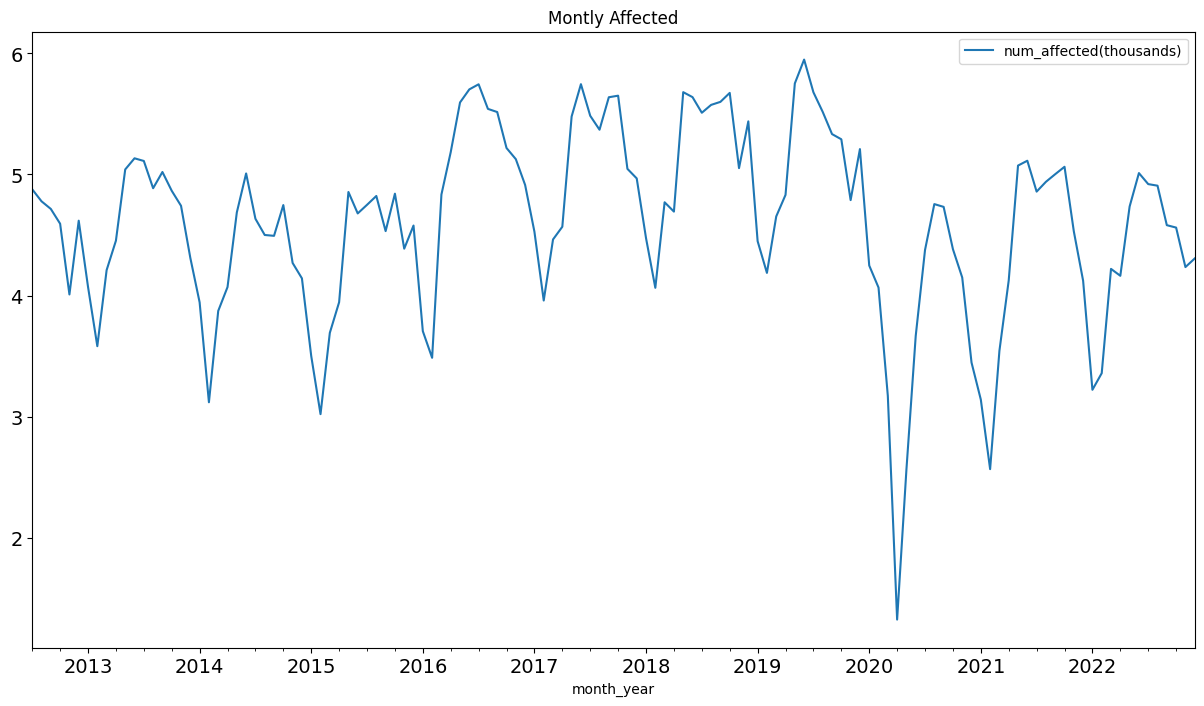

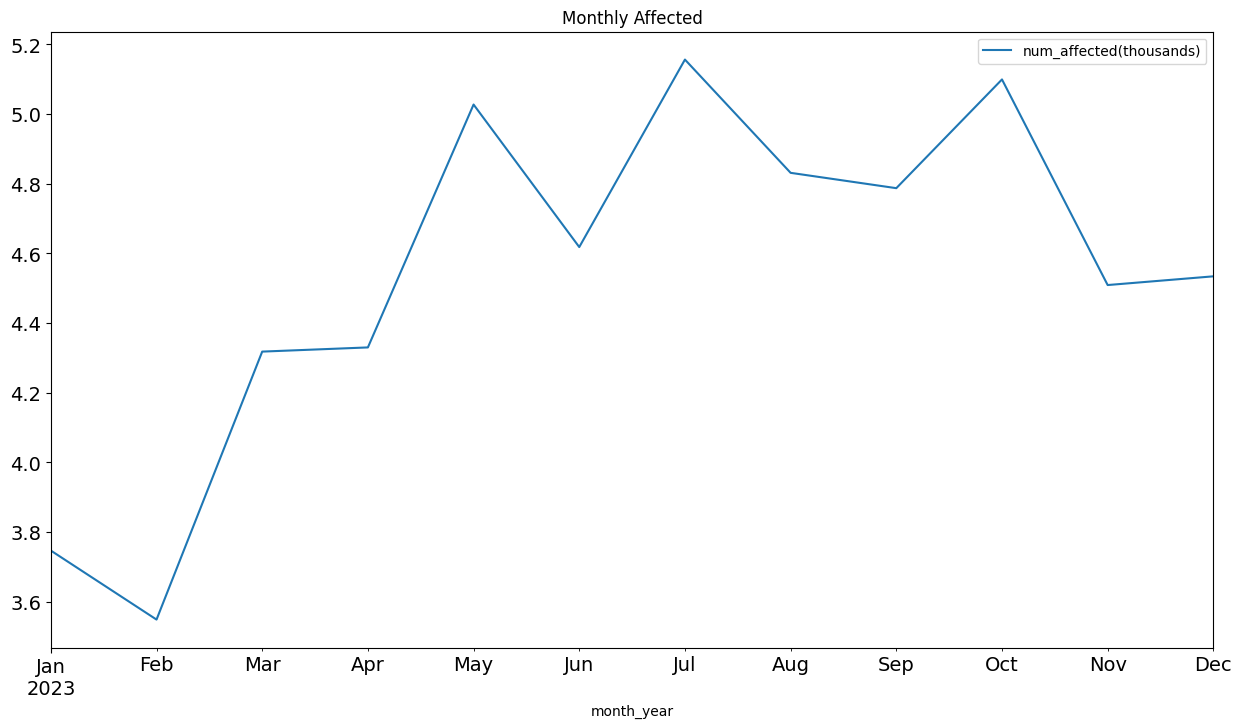

In [70]:
train.plot(figsize=(15,8), title= 'Montly Affected', fontsize=14)
test.plot(figsize=(15,8), title= 'Monthly Affected', fontsize=14)
plt.show()

In [71]:
dd= np.asarray(train['num_affected(thousands)'])
y_hat = test.copy()
y_hat['naive'] = dd[len(dd)-1]

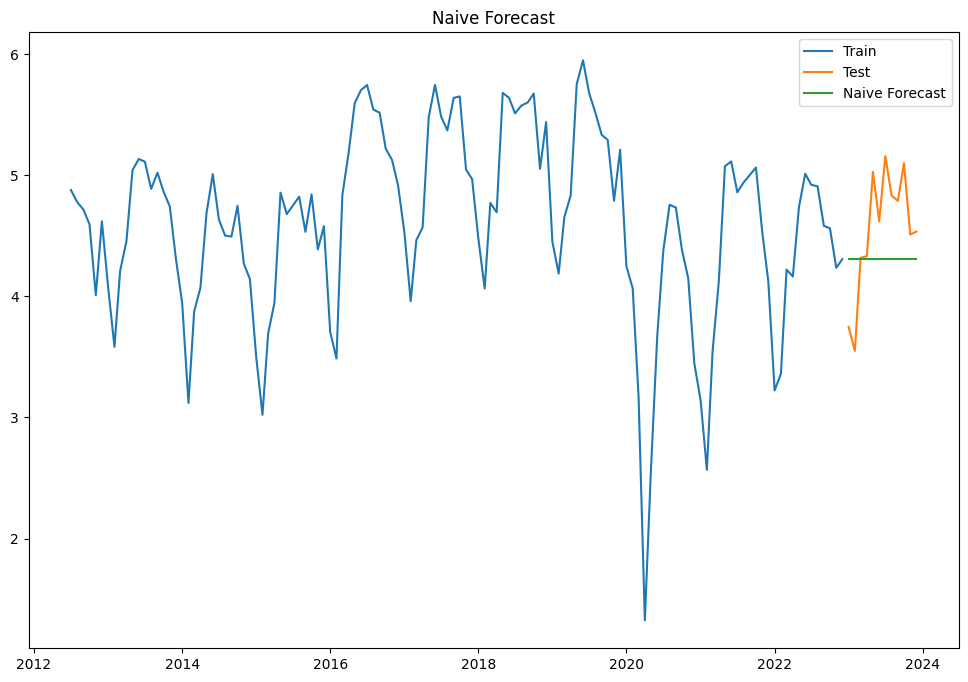

In [72]:
plt.figure(figsize=(12,8))
plt.plot(train.index, train, label='Train')
plt.plot(test.index,test, label='Test')
plt.plot(y_hat.index,y_hat['naive'], label='Naive Forecast')
plt.legend(loc='best')
plt.title("Naive Forecast")
plt.show()

In [73]:
rms = np.sqrt(mean_squared_error(test['num_affected(thousands)'], y_hat.naive))
print(rms)

0.5365757945838905


Simple Average

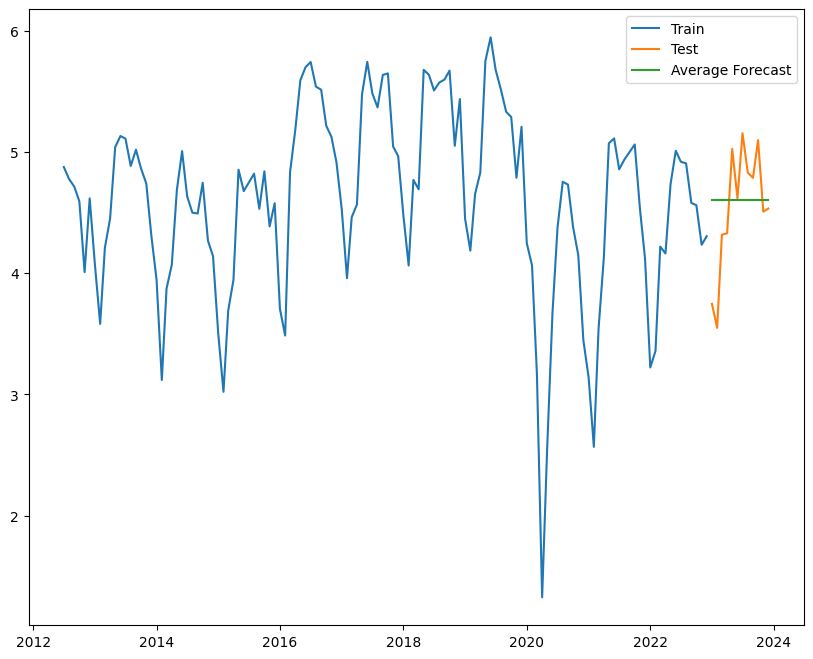

In [74]:
y_hat_avg = test.copy()
y_hat_avg['avg_forecast'] = train['num_affected(thousands)'].mean()
plt.figure(figsize=(10,8))
plt.plot(train, label='Train')
plt.plot(test, label='Test')
plt.plot(y_hat_avg['avg_forecast'], label='Average Forecast')
plt.legend(loc='best')
plt.show()

In [75]:
rms = np.sqrt(mean_squared_error(test['num_affected(thousands)'], y_hat_avg.avg_forecast))
print(rms)

0.4862562411796561


Moving Average Forecast

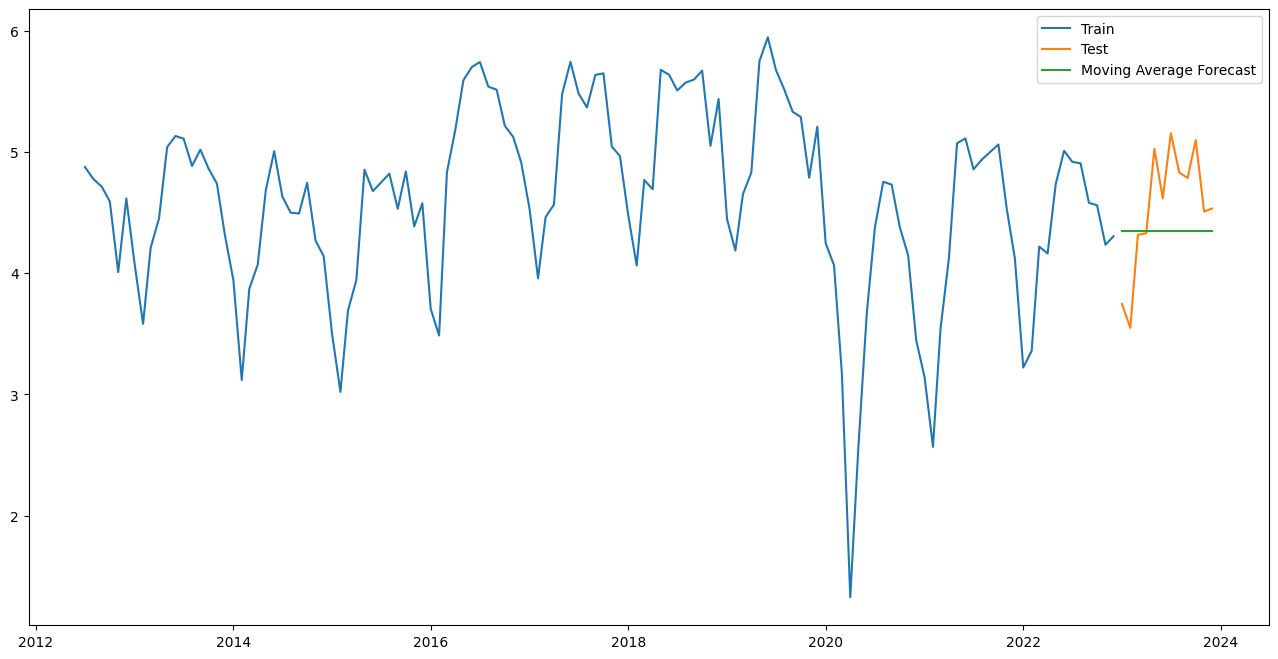

In [76]:
y_hat_avg = test.copy()
y_hat_avg['moving_avg_forecast'] = train['num_affected(thousands)'].rolling(12).mean().iloc[-1]
plt.figure(figsize=(16,8))
plt.plot(train, label='Train')
plt.plot(test, label='Test')
plt.plot(y_hat_avg['moving_avg_forecast'], label='Moving Average Forecast')
plt.legend(loc='best')
plt.show()

In [77]:
rms = np.sqrt(mean_squared_error(test['num_affected(thousands)'], y_hat_avg.moving_avg_forecast))
print(rms)

0.5181088206159011


Simple Exponential smoothing

num_affected(thousands)    4.467536
Name: 2022-12-01 00:00:00, dtype: float64 3.747
0.4456137680288697


C:\Users\jmitc\AppData\Local\Temp\ipykernel_24992\2795504184.py:11: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  print(ft, test['num_affected(thousands)'][0])
C:\Users\jmitc\AppData\Local\Temp\ipykernel_24992\2795504184.py:13: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  dt = test['num_affected(thousands)'][i-1]
c:\Users\jmitc\anaconda3\envs\Assignment\Lib\site-packages\sklearn\utils\_array_api.py:521: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  array = numpy.asarray(array, order=order, dtype=dtype)
c:\Users\jmitc\a

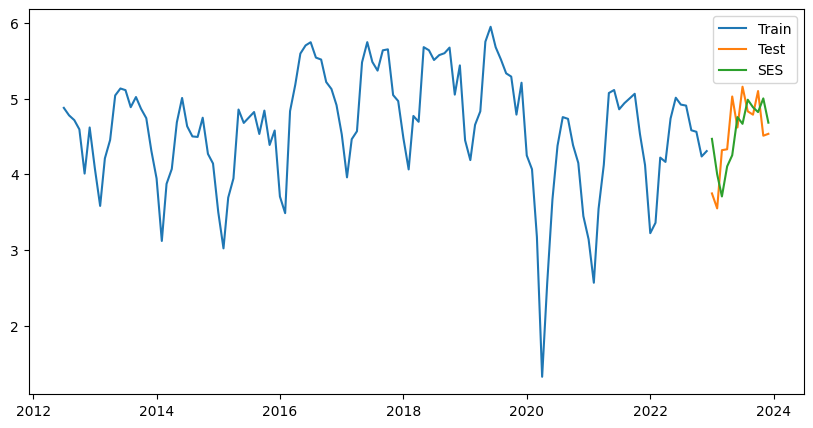

In [78]:
y_hat_avg = test.copy()

pred = []
#s = 9
a = 0.65
#a = 2/(s+1)
#ft = pd.DataFrame.ewm(train, alpha = a).mean()['gym'][-1]
ft = pd.DataFrame.ewm(train, span = 10).mean().iloc[-1]
#ft = train['gym'].mean()
pred.append(ft)
print(ft, test['num_affected(thousands)'][0])
for i in range(1,len(test['num_affected(thousands)'])):
    dt = test['num_affected(thousands)'][i-1]
    ft_plus_1 = a*dt + (1-a)*ft
    #print(i, dt, ft, ft_plus_1)
    pred.append(ft_plus_1)
    ft = ft_plus_1
y_hat_avg['SES'] = pd.Series(pred).values

rms = np.sqrt(mean_squared_error(test, y_hat_avg.SES))
print(rms)

plt.figure(figsize=(10,5))
plt.plot(train, label='Train')
plt.plot(test, label='Test')
plt.plot(y_hat_avg['SES'], label='SES')
plt.legend(loc='best')
plt.show()

In [79]:
rms = np.sqrt(mean_squared_error(test['num_affected(thousands)'], y_hat_avg.SES))
print(rms)

0.4456137680288697


c:\Users\jmitc\anaconda3\envs\Assignment\Lib\site-packages\sklearn\utils\_array_api.py:521: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  array = numpy.asarray(array, order=order, dtype=dtype)


ARIMA Model

In [80]:
from statsmodels.graphics.tsaplots import plot_acf

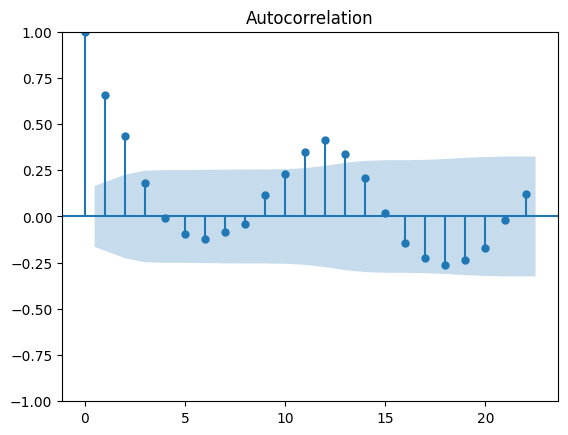

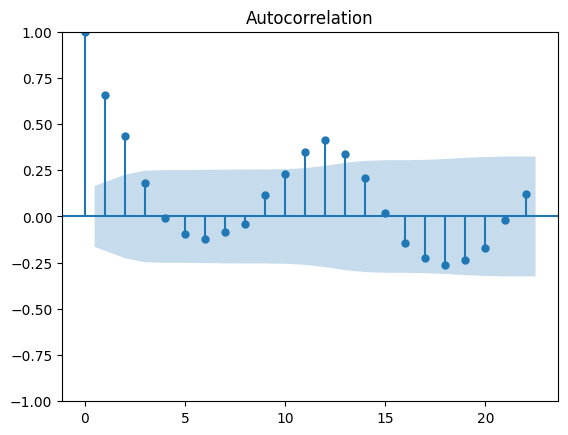

In [81]:
plot_acf(reg_df_2['num_affected(thousands)'])

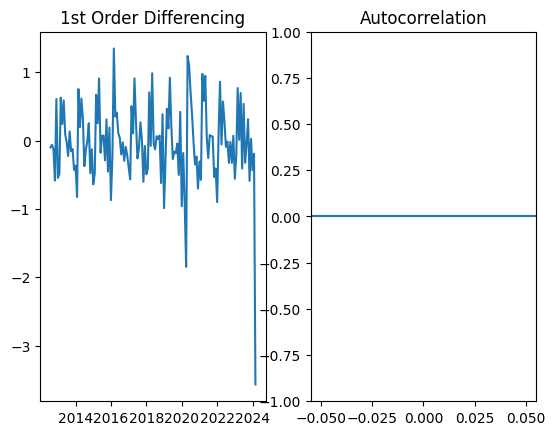

In [82]:
f = plt.figure()
ax1= f.add_subplot(121)
ax1.set_title("1st Order Differencing")
ax1.plot(reg_df_2['num_affected(thousands)'].diff())

ax2 = f.add_subplot(122)
plot_acf(reg_df_2['num_affected(thousands)'].diff(), ax=ax2)
plt.show()

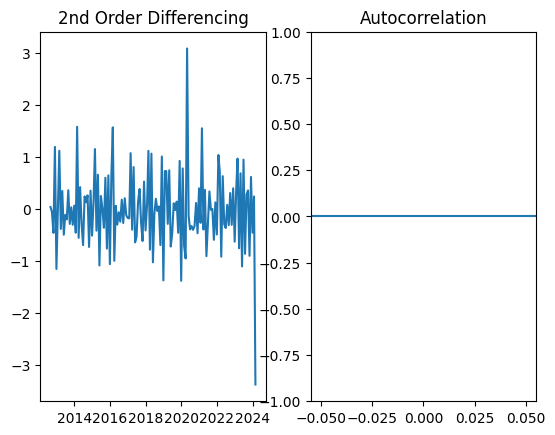

In [83]:
f = plt.figure()
ax1= f.add_subplot(121)
ax1.set_title("2nd Order Differencing")
ax1.plot(reg_df_2['num_affected(thousands)'].diff().diff())

ax2 = f.add_subplot(122)
plot_acf(reg_df_2['num_affected(thousands)'].diff().diff(), ax=ax2)
plt.show()

In [84]:
from statsmodels.tsa.stattools import adfuller

In [85]:
result = adfuller(reg_df_2['num_affected(thousands)'])
print(f"p value: {result[1]}")

#result = adfuller(reg_df_2['num_affected(thousands)'].diff())
#print(f"p value: {result[1]}")

#result = adfuller(reg_df_2['num_affected(thousands)'].diff().diff())
#print(f"p value: {result[1]}")

p value: 0.48666423156705624


It appears that you cant find the difference of this dataset hence we will plot the ARIMA Model based on the original data

In [86]:
from statsmodels.tsa.arima.model import ARIMA

In [87]:
arima_model = ARIMA(reg_df_2['num_affected(thousands)'],order=(1,1,3))
model = arima_model.fit()
print(model.summary())

c:\Users\jmitc\anaconda3\envs\Assignment\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
c:\Users\jmitc\anaconda3\envs\Assignment\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
c:\Users\jmitc\anaconda3\envs\Assignment\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


                                  SARIMAX Results                                  
Dep. Variable:     num_affected(thousands)   No. Observations:                  141
Model:                      ARIMA(1, 1, 3)   Log Likelihood                -114.384
Date:                     Tue, 16 Apr 2024   AIC                            238.767
Time:                             14:41:38   BIC                            253.475
Sample:                         07-01-2012   HQIC                           244.744
                              - 03-01-2024                                         
Covariance Type:                       opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.6276      0.141      4.436      0.000       0.350       0.905
ma.L1         -0.7302      0.187     -3.913      0.000      -1.096      -0.364
ma.L2       

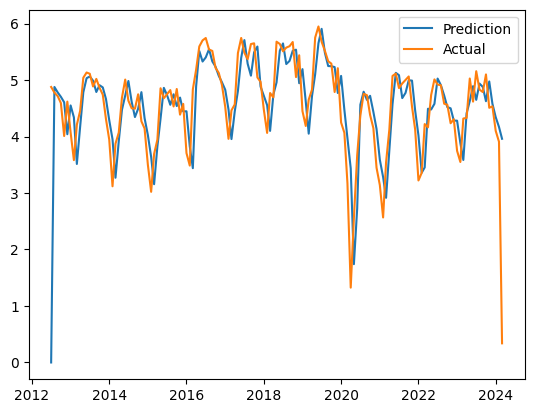

In [88]:
plt.plot(model.predict(dynamic=False))
plt.plot(reg_df_2['num_affected(thousands)'])
plt.legend(("Prediction","Actual"))

(array([19814., 19828., 19844., 19858., 19875., 19889., 19905., 19919.,
        19936.]),
 [Text(19814.0, 0, '2024-04-01'),
  Text(19828.0, 0, '2024-04-15'),
  Text(19844.0, 0, '2024-05-01'),
  Text(19858.0, 0, '2024-05-15'),
  Text(19875.0, 0, '2024-06-01'),
  Text(19889.0, 0, '2024-06-15'),
  Text(19905.0, 0, '2024-07-01'),
  Text(19919.0, 0, '2024-07-15'),
  Text(19936.0, 0, '2024-08-01')])

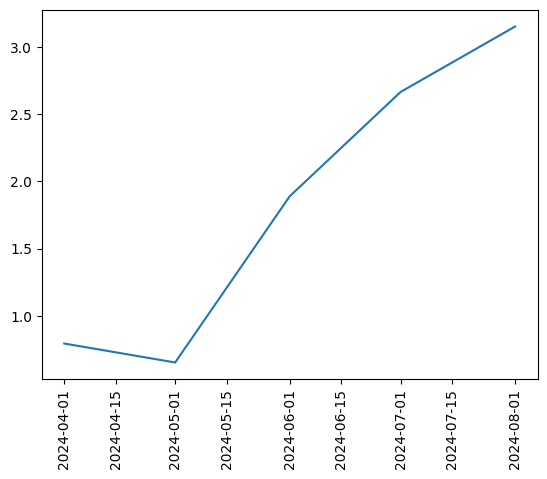

In [89]:
plt.plot(model.forecast(5,True))
plt.xticks(rotation=90)

TIME SERIES BY BOROUGH

In [90]:
reg_df_3 = reg_df[['NUMBER OF PERSONS INJURED','NUMBER OF PERSONS KILLED','NUM PERSONS AFFECTED','month_year','BOROUGH','LOCATION','LONGITUDE','LATITUDE']]
reg_df_3.head()

,NUMBER OF PERSONS INJURED,NUMBER OF PERSONS KILLED,NUM PERSONS AFFECTED,month_year,BOROUGH,LOCATION,LONGITUDE,LATITUDE
0,2.0,0.0,2.0,2021-09-01,NaN,NaN,NaN,NaN
1,1.0,0.0,1.0,2022-03-01,NaN,NaN,NaN,NaN
2,0.0,0.0,0.0,2022-06-01,NaN,NaN,NaN,NaN
3,0.0,0.0,0.0,2021-09-01,BROOKLYN,"(40.667202, -73.8665)",-73.866500,40.667202
4,0.0,0.0,0.0,2021-12-01,BROOKLYN,"(40.683304, -73.917274)",-73.917274,40.683304


In [91]:
print(reg_df_3.isna().sum())
print(reg_df_3.shape)

NUMBER OF PERSONS INJURED        18
NUMBER OF PERSONS KILLED         31
NUM PERSONS AFFECTED             37
month_year                        0
BOROUGH                      644237
LOCATION                     233351
LONGITUDE                    233351
LATITUDE                     233351
dtype: int64
(2070594, 8)


In [92]:
reg_df_3 = reg_df_3.dropna()
reg_df_3.isnull().sum()

NUMBER OF PERSONS INJURED    0
NUMBER OF PERSONS KILLED     0
NUM PERSONS AFFECTED         0
month_year                   0
BOROUGH                      0
LOCATION                     0
LONGITUDE                    0
LATITUDE                     0
dtype: int64

In [93]:
#unusable = reg_df_3[reg_df_3['LOCATION'].isnull() & reg_df_3['BOROUGH'].isnull()].index
#reg_df_3 = reg_df_3.drop(unusable)
#reg_df_3

In [94]:
reg_df_3_NB = reg_df_3[reg_df_3['BOROUGH'].isnull()]
reg_df_3_NB

,NUMBER OF PERSONS INJURED,NUMBER OF PERSONS KILLED,NUM PERSONS AFFECTED,month_year,BOROUGH,LOCATION,LONGITUDE,LATITUDE


In [95]:
from geopy.distance import geodesic

# Define the coordinates for the boundaries of each NYC borough
borough_boundaries = {
    'Manhattan': [(40.698457, -74.019327), (40.872023, -73.910044)],
    'Brooklyn': [(40.570842, -74.042787), (40.739446, -73.833365)],
    'Queens': [(40.477399, -73.866095), (40.806807, -73.700272)],
    'Bronx': [(40.785881, -73.933510), (40.917533, -73.765206)],
    'Staten Island': [(40.477199, -74.259090), (40.651278, -74.034278)]
}

In [96]:
def get_borough_from_coords(latitude, longitude):
    point = (latitude, longitude)
    for borough, boundaries in borough_boundaries.items():
        if boundaries[0][0] <= latitude <= boundaries[1][0] and boundaries[0][1] <= longitude <= boundaries[1][1]:
            return borough
    return 'Unknown'

def add_borough_column(df):
    df['Borough'] = df.apply(lambda row: get_borough_from_coords(row['LATITUDE'], row['LONGITUDE']), axis=1)
    return df

In [97]:
#reg_df_bor_added = add_borough_column(df[['LONGITUDE','LATITUDE']])
#reg_df_bor_added

In [98]:
df['BOROUGH'].unique()

array([nan, 'BROOKLYN', 'BRONX', 'MANHATTAN', 'QUEENS', 'STATEN ISLAND'],
      dtype=object)

In [99]:
brook_df = reg_df_3[reg_df_3['BOROUGH'] == 'BROOKLYN']
brook_df = brook_df[['NUMBER OF PERSONS INJURED','NUMBER OF PERSONS KILLED','NUM PERSONS AFFECTED','month_year']].groupby('month_year').sum()

queen_df = reg_df_3[reg_df_3['BOROUGH'] == 'QUEENS']
queen_df = queen_df[['NUMBER OF PERSONS INJURED','NUMBER OF PERSONS KILLED','NUM PERSONS AFFECTED','month_year']].groupby('month_year').sum()


bronx_df = reg_df_3[reg_df_3['BOROUGH'] == 'BRONX']
bronx_df = bronx_df[['NUMBER OF PERSONS INJURED','NUMBER OF PERSONS KILLED','NUM PERSONS AFFECTED','month_year']].groupby('month_year').sum()


man_df = reg_df_3[reg_df_3['BOROUGH'] == 'MANHATTAN']
man_df = man_df[['NUMBER OF PERSONS INJURED','NUMBER OF PERSONS KILLED','NUM PERSONS AFFECTED','month_year']].groupby('month_year').sum()


statIsl_df = reg_df_3[reg_df_3['BOROUGH'] == 'STATEN ISLAND']
statIsl_df = statIsl_df[['NUMBER OF PERSONS INJURED','NUMBER OF PERSONS KILLED','NUM PERSONS AFFECTED','month_year']].groupby('month_year').sum()


In [100]:
brook_df['num_injured(thousands)'] = brook_df['NUMBER OF PERSONS INJURED']/1000
brook_df['num_killed(tens)'] = brook_df['NUMBER OF PERSONS KILLED']/10
brook_df['num_affected(thousands)'] = brook_df['NUM PERSONS AFFECTED']/1000
brook_df = brook_df.drop(['NUMBER OF PERSONS INJURED','NUMBER OF PERSONS KILLED','NUM PERSONS AFFECTED'],axis=1)

queen_df['num_injured(thousands)'] = queen_df['NUMBER OF PERSONS INJURED']/1000
queen_df['num_killed(tens)'] = queen_df['NUMBER OF PERSONS KILLED']/10
queen_df['num_affected(thousands)'] = queen_df['NUM PERSONS AFFECTED']/1000
queen_df = queen_df.drop(['NUMBER OF PERSONS INJURED','NUMBER OF PERSONS KILLED','NUM PERSONS AFFECTED'],axis=1)

bronx_df['num_injured(thousands)'] = bronx_df['NUMBER OF PERSONS INJURED']/1000
bronx_df['num_killed(tens)'] = bronx_df['NUMBER OF PERSONS KILLED']/10
bronx_df['num_affected(thousands)'] = bronx_df['NUM PERSONS AFFECTED']/1000
bronx_df = bronx_df.drop(['NUMBER OF PERSONS INJURED','NUMBER OF PERSONS KILLED','NUM PERSONS AFFECTED'],axis=1)

man_df['num_injured(thousands)'] = man_df['NUMBER OF PERSONS INJURED']/1000
man_df['num_killed(tens)'] = man_df['NUMBER OF PERSONS KILLED']/10
man_df['num_affected(thousands)'] = man_df['NUM PERSONS AFFECTED']/1000
man_df = man_df.drop(['NUMBER OF PERSONS INJURED','NUMBER OF PERSONS KILLED','NUM PERSONS AFFECTED'],axis=1)

statIsl_df['num_injured(thousands)'] = statIsl_df['NUMBER OF PERSONS INJURED']/1000
statIsl_df['num_killed(tens)'] = statIsl_df['NUMBER OF PERSONS KILLED']/10
statIsl_df['num_affected(thousands)'] = statIsl_df['NUM PERSONS AFFECTED']/1000
statIsl_df = statIsl_df.drop(['NUMBER OF PERSONS INJURED','NUMBER OF PERSONS KILLED','NUM PERSONS AFFECTED'],axis=1)

Text(0.5, 1.0, 'Affected Persons by Borough')

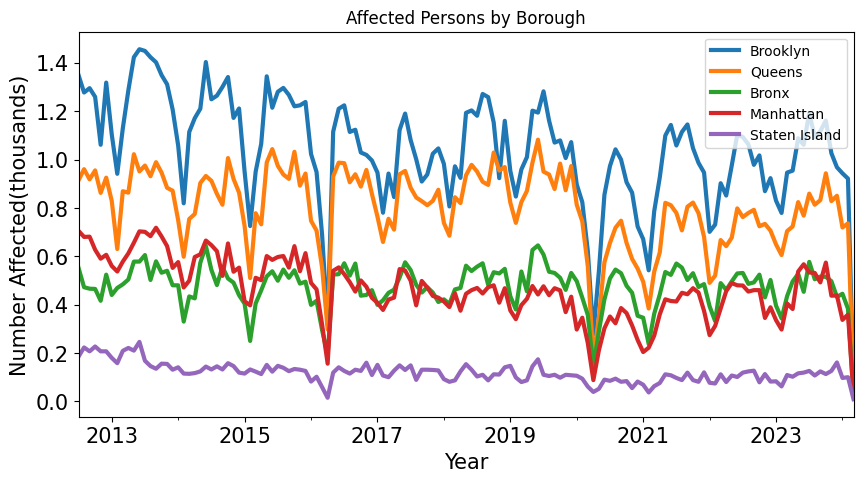

In [101]:
brook_df['num_affected(thousands)'].plot(figsize=(10,5), linewidth=3, fontsize=15)
queen_df['num_affected(thousands)'].plot(figsize=(10,5), linewidth=3, fontsize=15)
bronx_df['num_affected(thousands)'].plot(figsize=(10,5), linewidth=3, fontsize=15)
man_df['num_affected(thousands)'].plot(figsize=(10,5), linewidth=3, fontsize=15)
statIsl_df['num_affected(thousands)'].plot(figsize=(10,5), linewidth=3, fontsize=15)
plt.xlabel('Year', fontsize=15);
plt.ylabel('Number Affected(thousands)', fontsize=15);
plt.legend(('Brooklyn','Queens','Bronx','Manhattan','Staten Island'))
plt.title("Affected Persons by Borough")


Text(0.5, 1.0, 'Injured Persons by Borough')

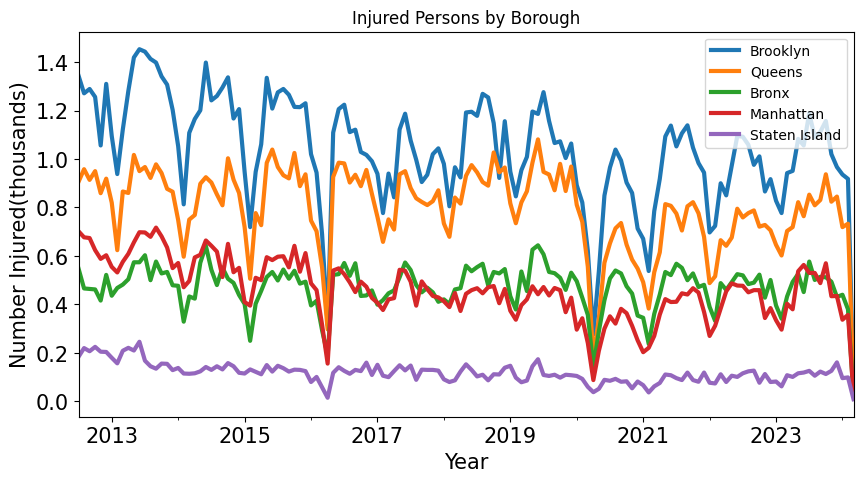

In [102]:
brook_df['num_injured(thousands)'].plot(figsize=(10,5), linewidth=3, fontsize=15)
queen_df['num_injured(thousands)'].plot(figsize=(10,5), linewidth=3, fontsize=15)
bronx_df['num_injured(thousands)'].plot(figsize=(10,5), linewidth=3, fontsize=15)
man_df['num_injured(thousands)'].plot(figsize=(10,5), linewidth=3, fontsize=15)
statIsl_df['num_injured(thousands)'].plot(figsize=(10,5), linewidth=3, fontsize=15)
plt.xlabel('Year', fontsize=15);
plt.ylabel('Number Injured(thousands)', fontsize=15);
plt.legend(('Brooklyn','Queens','Bronx','Manhattan','Staten Island'))
plt.title("Injured Persons by Borough")

Text(0.5, 1.0, 'Killed Persons by Borough')

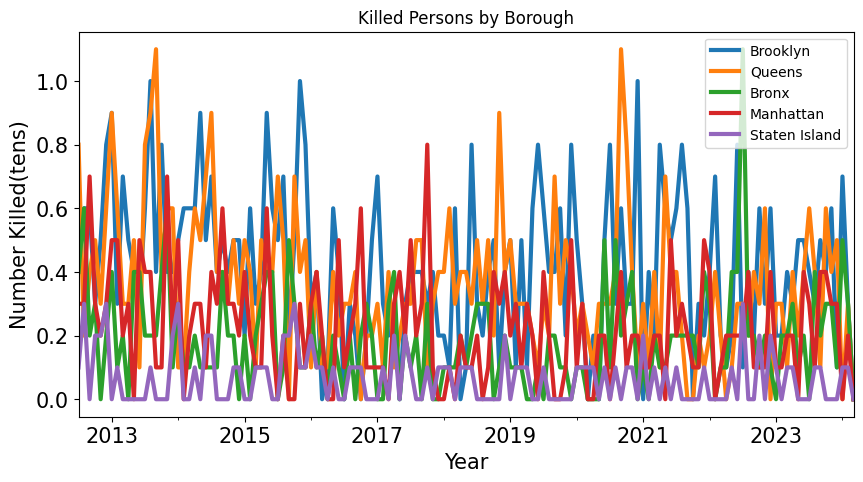

In [103]:
brook_df['num_killed(tens)'].plot(figsize=(10,5), linewidth=3, fontsize=15)
queen_df['num_killed(tens)'].plot(figsize=(10,5), linewidth=3, fontsize=15)
bronx_df['num_killed(tens)'].plot(figsize=(10,5), linewidth=3, fontsize=15)
man_df['num_killed(tens)'].plot(figsize=(10,5), linewidth=3, fontsize=15)
statIsl_df['num_killed(tens)'].plot(figsize=(10,5), linewidth=3, fontsize=15)
plt.xlabel('Year', fontsize=15);
plt.ylabel('Number Killed(tens)', fontsize=15);
plt.legend(('Brooklyn','Queens','Bronx','Manhattan','Staten Island'))
plt.title("Killed Persons by Borough")

BROOKLYN ARIMA ANALYSIS

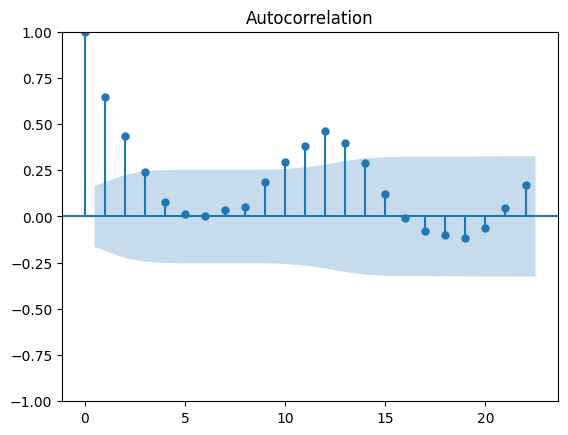

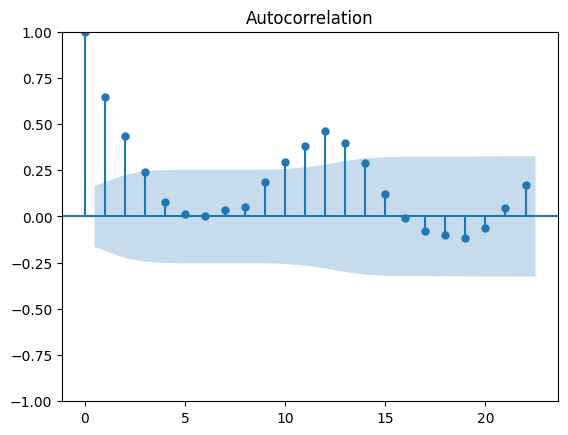

In [104]:
plot_acf(brook_df['num_affected(thousands)'])

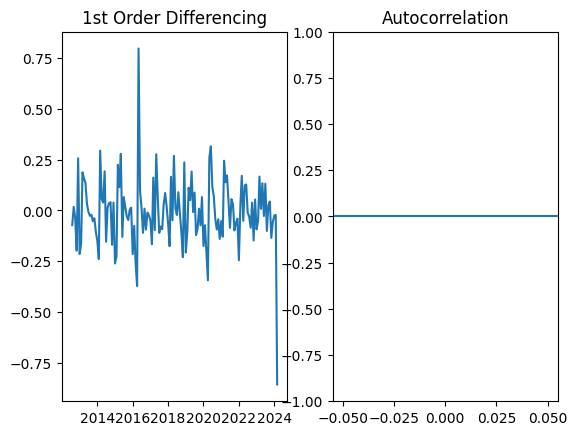

In [105]:
f = plt.figure()
ax1= f.add_subplot(121)
ax1.set_title("1st Order Differencing")
ax1.plot(brook_df['num_affected(thousands)'].diff())

ax2 = f.add_subplot(122)
plot_acf(brook_df['num_affected(thousands)'].diff(), ax=ax2)
plt.show()

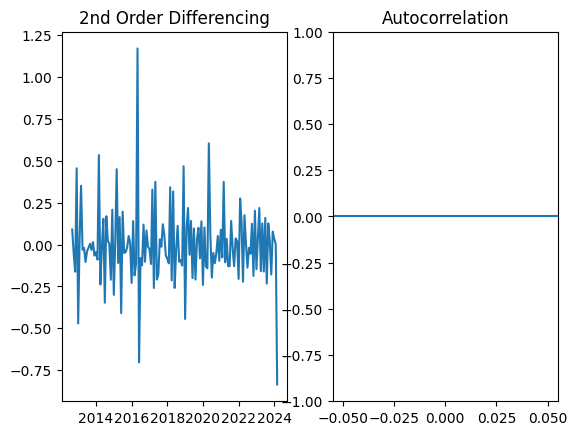

In [106]:
f = plt.figure()
ax1= f.add_subplot(121)
ax1.set_title("2nd Order Differencing")
ax1.plot(brook_df['num_affected(thousands)'].diff().diff())

ax2 = f.add_subplot(122)
plot_acf(brook_df['num_affected(thousands)'].diff().diff(), ax=ax2)
plt.show()

In [107]:
result = adfuller(brook_df['num_affected(thousands)'])
print(f"p value: {result[1]}")

p value: 0.526357394885716


In [108]:
arima_model = ARIMA(brook_df['num_affected(thousands)'],order=(1,1,3))
model = arima_model.fit()
print(model.summary())

c:\Users\jmitc\anaconda3\envs\Assignment\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
c:\Users\jmitc\anaconda3\envs\Assignment\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
c:\Users\jmitc\anaconda3\envs\Assignment\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


                                  SARIMAX Results                                  
Dep. Variable:     num_affected(thousands)   No. Observations:                  141
Model:                      ARIMA(1, 1, 3)   Log Likelihood                  59.464
Date:                     Tue, 16 Apr 2024   AIC                           -108.927
Time:                             14:41:44   BIC                            -94.219
Sample:                         07-01-2012   HQIC                          -102.950
                              - 03-01-2024                                         
Covariance Type:                       opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.5271      0.315      1.674      0.094      -0.090       1.144
ma.L1         -0.7406      0.369     -2.006      0.045      -1.464      -0.017
ma.L2       

Text(0.5, 1.0, 'Predicted vs Actual Number of Affected in Brooklyn')

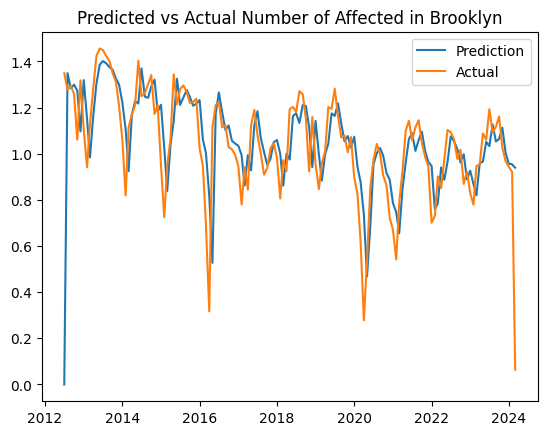

In [109]:
plt.plot(model.predict(dynamic=False))
plt.plot(brook_df['num_affected(thousands)'])
plt.legend(("Prediction","Actual"))
plt.title("Predicted vs Actual Number of Affected in Brooklyn")

(array([19814., 19828., 19844., 19858., 19875., 19889., 19905., 19919.,
        19936.]),
 [Text(19814.0, 0, '2024-04-01'),
  Text(19828.0, 0, '2024-04-15'),
  Text(19844.0, 0, '2024-05-01'),
  Text(19858.0, 0, '2024-05-15'),
  Text(19875.0, 0, '2024-06-01'),
  Text(19889.0, 0, '2024-06-15'),
  Text(19905.0, 0, '2024-07-01'),
  Text(19919.0, 0, '2024-07-15'),
  Text(19936.0, 0, '2024-08-01')])

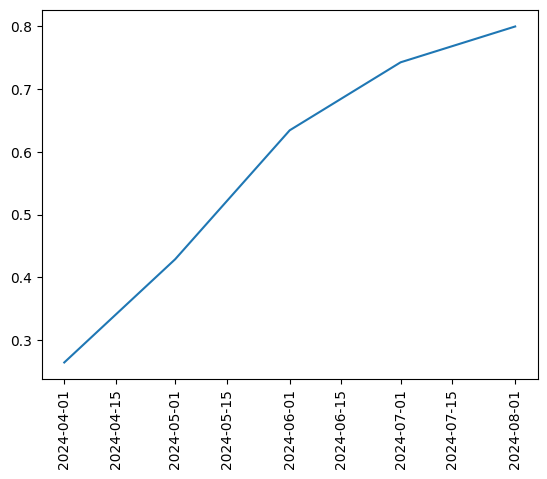

In [110]:
plt.plot(model.forecast(5,True))
plt.xticks(rotation=90)

<h1>ARIMA Modelling for QUEENS</h1>

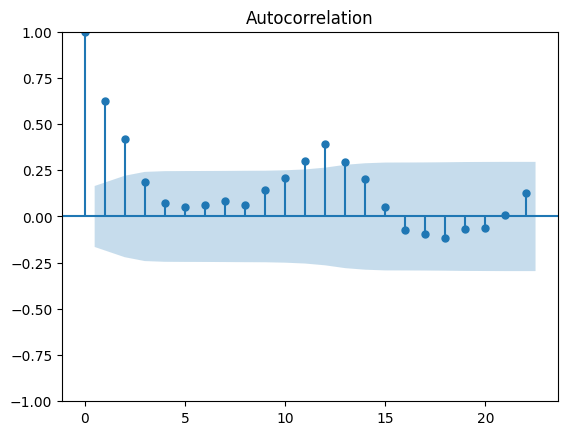

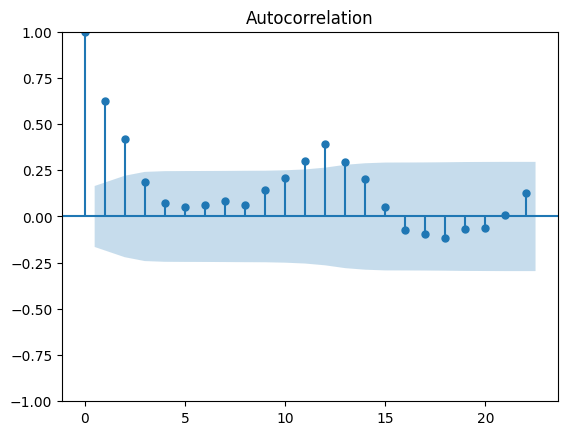

In [111]:
plot_acf(queen_df['num_affected(thousands)'])

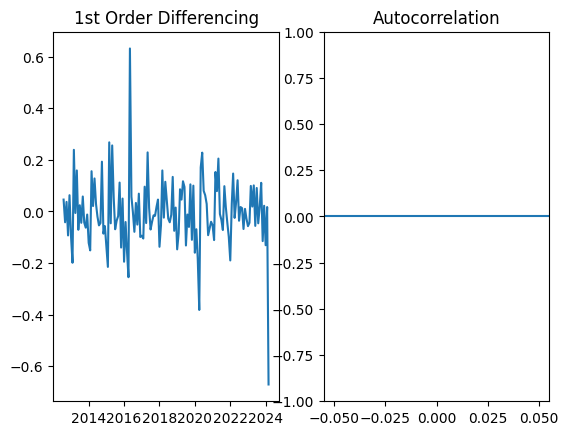

In [112]:
f = plt.figure()
ax1= f.add_subplot(121)
ax1.set_title("1st Order Differencing")
ax1.plot(queen_df['num_affected(thousands)'].diff())

ax2 = f.add_subplot(122)
plot_acf(queen_df['num_affected(thousands)'].diff(), ax=ax2)
plt.show()

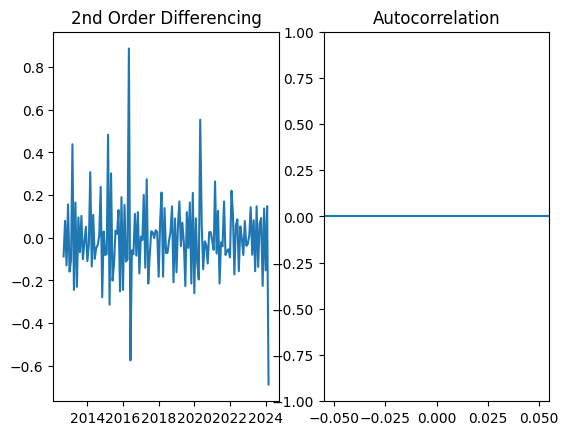

In [113]:
f = plt.figure()
ax1= f.add_subplot(121)
ax1.set_title("2nd Order Differencing")
ax1.plot(queen_df['num_affected(thousands)'].diff().diff())

ax2 = f.add_subplot(122)
plot_acf(queen_df['num_affected(thousands)'].diff().diff(), ax=ax2)
plt.show()

In [114]:
result = adfuller(queen_df['num_affected(thousands)'])
print(f"p value: {result[1]}")

p value: 0.48504069005054573


In [115]:
arima_model = ARIMA(queen_df['num_affected(thousands)'],order=(1,1,3))
model = arima_model.fit()
print(model.summary())

c:\Users\jmitc\anaconda3\envs\Assignment\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
c:\Users\jmitc\anaconda3\envs\Assignment\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
c:\Users\jmitc\anaconda3\envs\Assignment\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


                                  SARIMAX Results                                  
Dep. Variable:     num_affected(thousands)   No. Observations:                  141
Model:                      ARIMA(1, 1, 3)   Log Likelihood                  95.245
Date:                     Tue, 16 Apr 2024   AIC                           -180.489
Time:                             14:41:46   BIC                           -165.781
Sample:                         07-01-2012   HQIC                          -174.512
                              - 03-01-2024                                         
Covariance Type:                       opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.4452      0.242      1.837      0.066      -0.030       0.920
ma.L1         -0.7181      0.299     -2.405      0.016      -1.303      -0.133
ma.L2       

Text(0.5, 1.0, 'Predicted vs Actual Number of Affected in Queens')

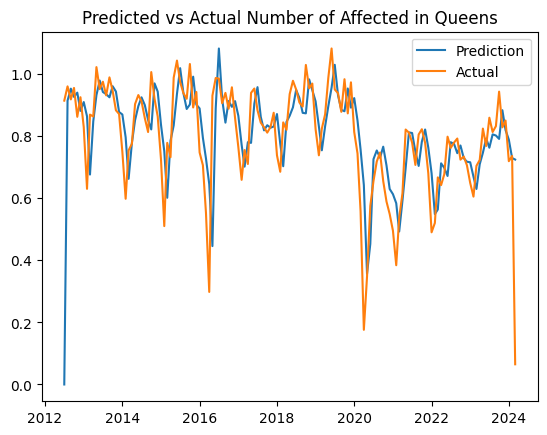

In [116]:
plt.plot(model.predict(dynamic=False))
plt.plot(queen_df['num_affected(thousands)'])
plt.legend(("Prediction","Actual"))
plt.title("Predicted vs Actual Number of Affected in Queens")

(array([19814., 19828., 19844., 19858., 19875., 19889., 19905., 19919.,
        19936.]),
 [Text(19814.0, 0, '2024-04-01'),
  Text(19828.0, 0, '2024-04-15'),
  Text(19844.0, 0, '2024-05-01'),
  Text(19858.0, 0, '2024-05-15'),
  Text(19875.0, 0, '2024-06-01'),
  Text(19889.0, 0, '2024-06-15'),
  Text(19905.0, 0, '2024-07-01'),
  Text(19919.0, 0, '2024-07-15'),
  Text(19936.0, 0, '2024-08-01')])

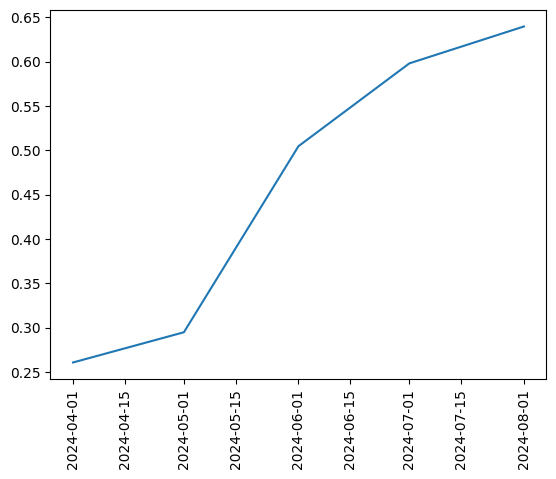

In [117]:
plt.plot(model.forecast(5,True))
plt.xticks(rotation=90)

<h1>ARIMA Modelling for Bronx</h1>

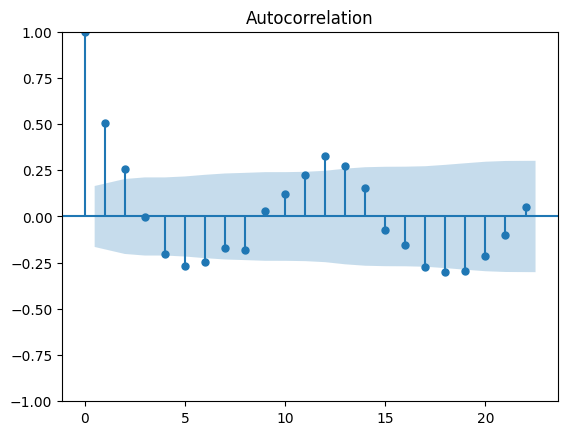

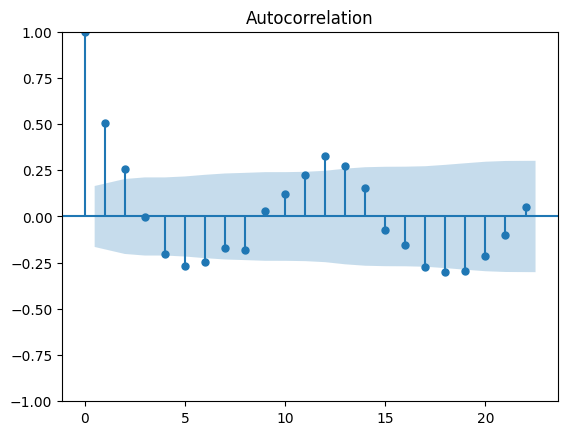

In [118]:
plot_acf(bronx_df['num_affected(thousands)'])

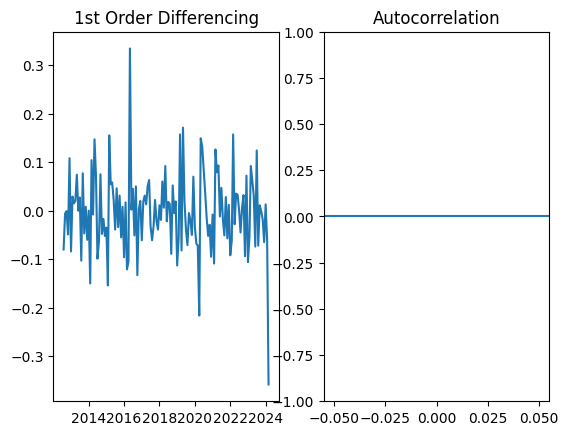

In [119]:
f = plt.figure()
ax1= f.add_subplot(121)
ax1.set_title("1st Order Differencing")
ax1.plot(bronx_df['num_affected(thousands)'].diff())

ax2 = f.add_subplot(122)
plot_acf(bronx_df['num_affected(thousands)'].diff(), ax=ax2)
plt.show()

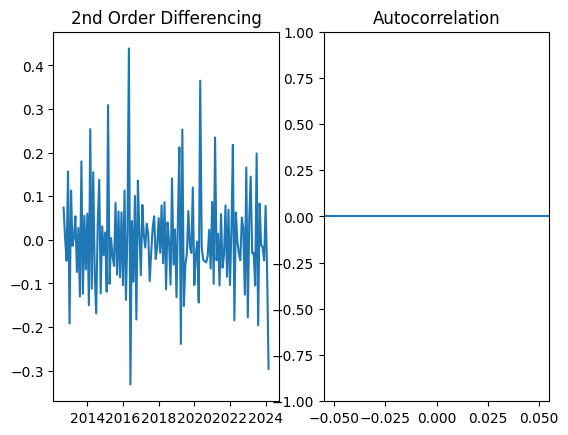

In [120]:
f = plt.figure()
ax1= f.add_subplot(121)
ax1.set_title("2nd Order Differencing")
ax1.plot(bronx_df['num_affected(thousands)'].diff().diff())

ax2 = f.add_subplot(122)
plot_acf(bronx_df['num_affected(thousands)'].diff().diff(), ax=ax2)
plt.show()

In [121]:
result = adfuller(bronx_df['num_affected(thousands)'])
print(f"p value: {result[1]}")

p value: 0.010687761452050597


In [122]:
arima_model = ARIMA(bronx_df['num_affected(thousands)'],order=(1,1,3))
model = arima_model.fit()
print(model.summary())

c:\Users\jmitc\anaconda3\envs\Assignment\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
c:\Users\jmitc\anaconda3\envs\Assignment\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
c:\Users\jmitc\anaconda3\envs\Assignment\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


                                  SARIMAX Results                                  
Dep. Variable:     num_affected(thousands)   No. Observations:                  141
Model:                      ARIMA(1, 1, 3)   Log Likelihood                 163.702
Date:                     Tue, 16 Apr 2024   AIC                           -317.403
Time:                             14:41:49   BIC                           -302.695
Sample:                         07-01-2012   HQIC                          -311.426
                              - 03-01-2024                                         
Covariance Type:                       opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.4634      0.262      1.766      0.077      -0.051       0.978
ma.L1         -0.8354      0.310     -2.691      0.007      -1.444      -0.227
ma.L2       

Text(0.5, 1.0, 'Predicted vs Actual Number of Affected in The Bronx')

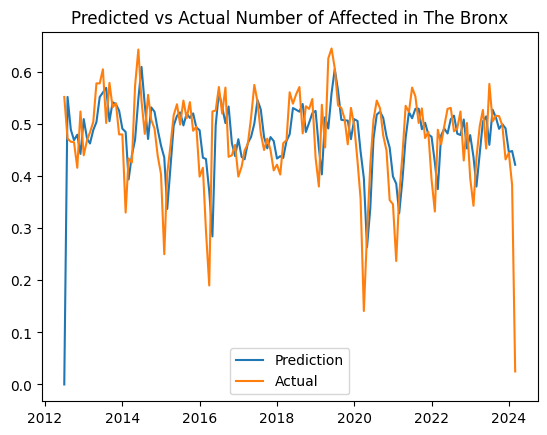

In [123]:
plt.plot(model.predict(dynamic=False))
plt.plot(bronx_df['num_affected(thousands)'])
plt.legend(("Prediction","Actual"))
plt.title("Predicted vs Actual Number of Affected in The Bronx")

(array([19814., 19828., 19844., 19858., 19875., 19889., 19905., 19919.,
        19936.]),
 [Text(19814.0, 0, '2024-04-01'),
  Text(19828.0, 0, '2024-04-15'),
  Text(19844.0, 0, '2024-05-01'),
  Text(19858.0, 0, '2024-05-15'),
  Text(19875.0, 0, '2024-06-01'),
  Text(19889.0, 0, '2024-06-15'),
  Text(19905.0, 0, '2024-07-01'),
  Text(19919.0, 0, '2024-07-15'),
  Text(19936.0, 0, '2024-08-01')])

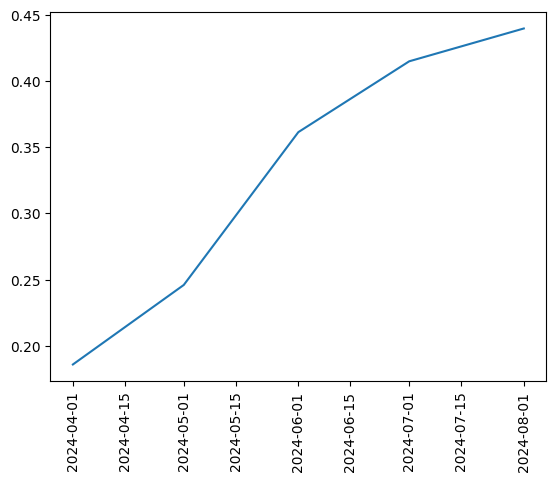

In [124]:
plt.plot(model.forecast(5,True))
plt.xticks(rotation=90)

<h1>ARIMA Modelling for Manhattan</h1>

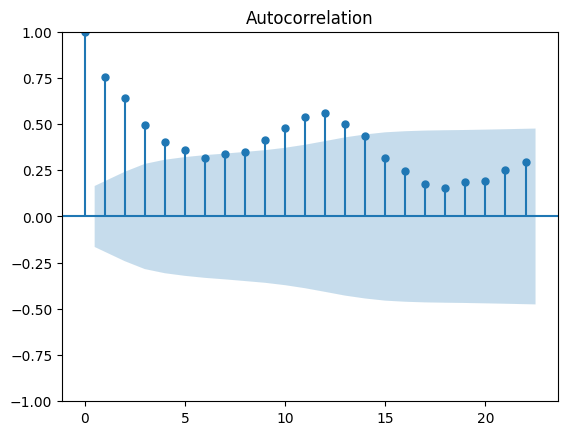

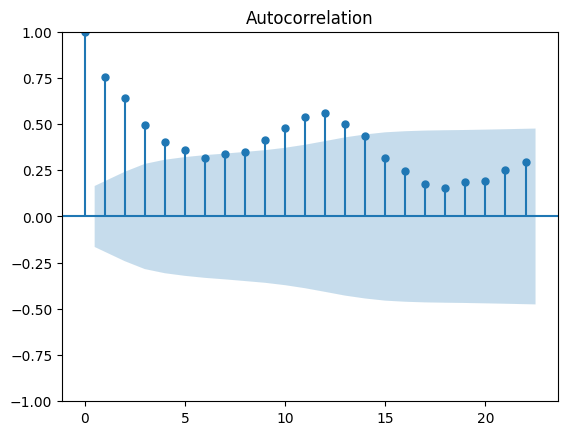

In [125]:
plot_acf(man_df['num_affected(thousands)'])

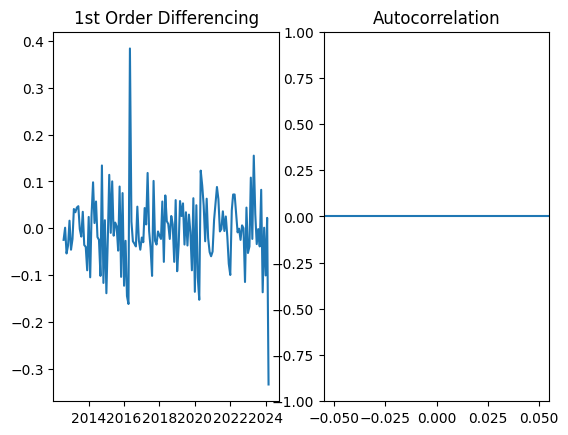

In [126]:
f = plt.figure()
ax1= f.add_subplot(121)
ax1.set_title("1st Order Differencing")
ax1.plot(man_df['num_affected(thousands)'].diff())

ax2 = f.add_subplot(122)
plot_acf(man_df['num_affected(thousands)'].diff(), ax=ax2)
plt.show()

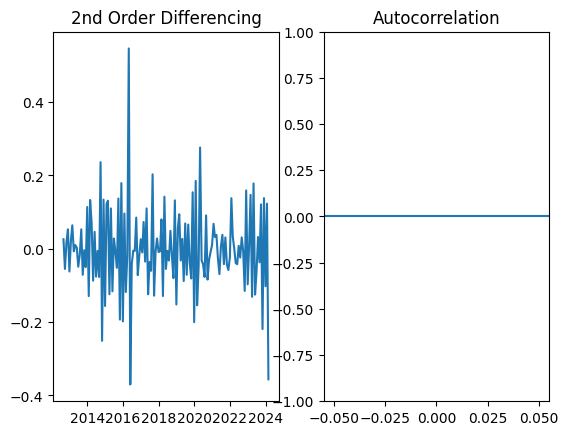

In [127]:
f = plt.figure()
ax1= f.add_subplot(121)
ax1.set_title("2nd Order Differencing")
ax1.plot(man_df['num_affected(thousands)'].diff().diff())

ax2 = f.add_subplot(122)
plot_acf(man_df['num_affected(thousands)'].diff().diff(), ax=ax2)
plt.show()

In [128]:
result = adfuller(man_df['num_affected(thousands)'])
print(f"p value: {result[1]}")

p value: 0.45282888693640966


In [129]:
arima_model = ARIMA(man_df['num_affected(thousands)'],order=(1,1,3))
model = arima_model.fit()
print(model.summary())

c:\Users\jmitc\anaconda3\envs\Assignment\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
c:\Users\jmitc\anaconda3\envs\Assignment\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
c:\Users\jmitc\anaconda3\envs\Assignment\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


                                  SARIMAX Results                                  
Dep. Variable:     num_affected(thousands)   No. Observations:                  141
Model:                      ARIMA(1, 1, 3)   Log Likelihood                 168.678
Date:                     Tue, 16 Apr 2024   AIC                           -327.356
Time:                             14:41:51   BIC                           -312.647
Sample:                         07-01-2012   HQIC                          -321.379
                              - 03-01-2024                                         
Covariance Type:                       opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.4954      0.214      2.318      0.020       0.077       0.914
ma.L1         -0.7758      0.241     -3.214      0.001      -1.249      -0.303
ma.L2       

Text(0.5, 1.0, 'Predicted vs Actual Number of Affected in Manhattan')

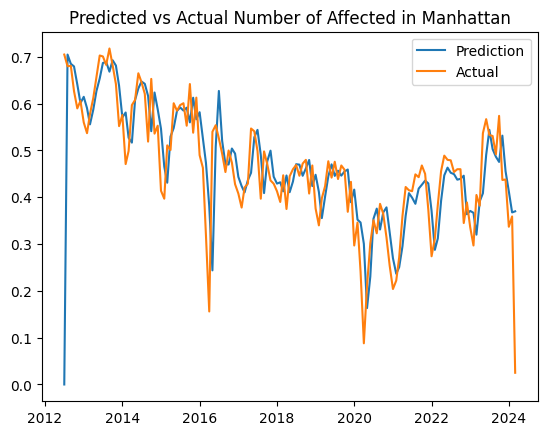

In [130]:
plt.plot(model.predict(dynamic=False))
plt.plot(man_df['num_affected(thousands)'])
plt.legend(("Prediction","Actual"))
plt.title("Predicted vs Actual Number of Affected in Manhattan")

(array([19814., 19828., 19844., 19858., 19875., 19889., 19905., 19919.,
        19936.]),
 [Text(19814.0, 0, '2024-04-01'),
  Text(19828.0, 0, '2024-04-15'),
  Text(19844.0, 0, '2024-05-01'),
  Text(19858.0, 0, '2024-05-15'),
  Text(19875.0, 0, '2024-06-01'),
  Text(19889.0, 0, '2024-06-15'),
  Text(19905.0, 0, '2024-07-01'),
  Text(19919.0, 0, '2024-07-15'),
  Text(19936.0, 0, '2024-08-01')])

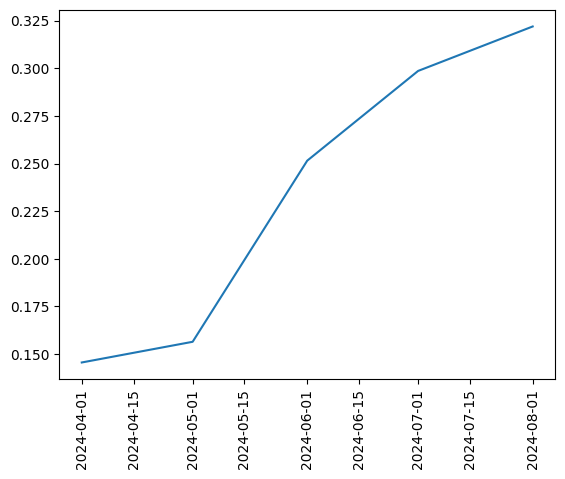

In [131]:
plt.plot(model.forecast(5,True))
plt.xticks(rotation=90)

<h1>ARIMA MODELLING FOR STATEN ISLAND</h1>

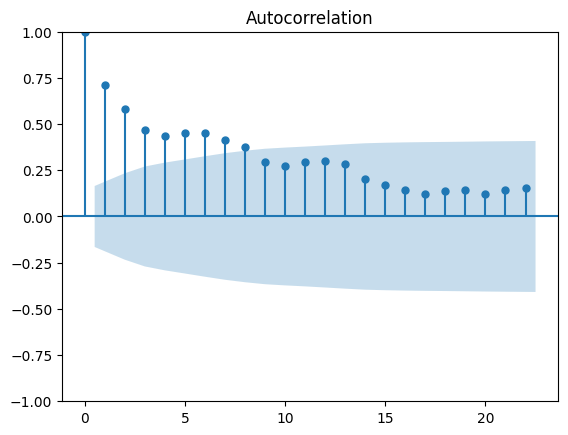

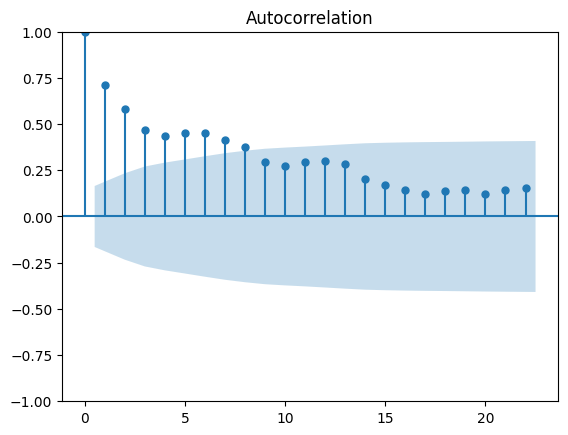

In [132]:
plot_acf(statIsl_df['num_affected(thousands)'])

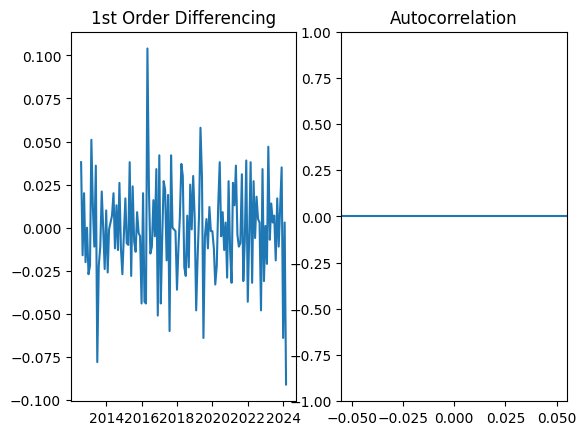

In [133]:
f = plt.figure()
ax1= f.add_subplot(121)
ax1.set_title("1st Order Differencing")
ax1.plot(statIsl_df['num_affected(thousands)'].diff())

ax2 = f.add_subplot(122)
plot_acf(statIsl_df['num_affected(thousands)'].diff(), ax=ax2)
plt.show()

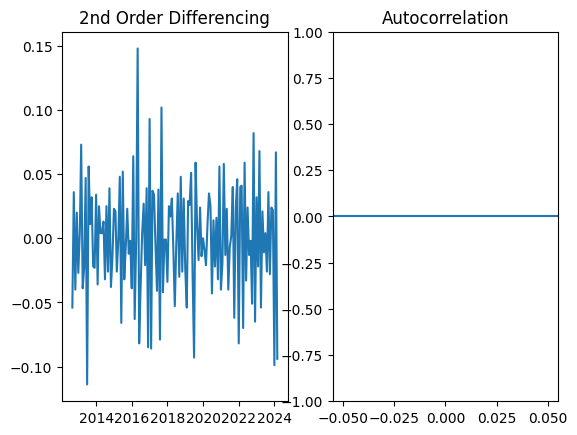

In [134]:
f = plt.figure()
ax1= f.add_subplot(121)
ax1.set_title("2nd Order Differencing")
ax1.plot(statIsl_df['num_affected(thousands)'].diff().diff())

ax2 = f.add_subplot(122)
plot_acf(statIsl_df['num_affected(thousands)'].diff().diff(), ax=ax2)
plt.show()

In [135]:
result = adfuller(statIsl_df['num_affected(thousands)'])
print(f"p value: {result[1]}")

p value: 0.0005095472082175051


In [136]:
arima_model = ARIMA(statIsl_df['num_affected(thousands)'],order=(1,1,3))
model = arima_model.fit()
print(model.summary())

c:\Users\jmitc\anaconda3\envs\Assignment\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
c:\Users\jmitc\anaconda3\envs\Assignment\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
c:\Users\jmitc\anaconda3\envs\Assignment\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


                                  SARIMAX Results                                  
Dep. Variable:     num_affected(thousands)   No. Observations:                  141
Model:                      ARIMA(1, 1, 3)   Log Likelihood                 313.051
Date:                     Tue, 16 Apr 2024   AIC                           -616.103
Time:                             14:41:54   BIC                           -601.394
Sample:                         07-01-2012   HQIC                          -610.126
                              - 03-01-2024                                         
Covariance Type:                       opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.1468      0.537      0.273      0.785      -0.905       1.199
ma.L1         -0.5842      0.528     -1.105      0.269      -1.620       0.452
ma.L2       

Text(0.5, 1.0, 'Predicted vs Actual Number of Affected in Staten Island')

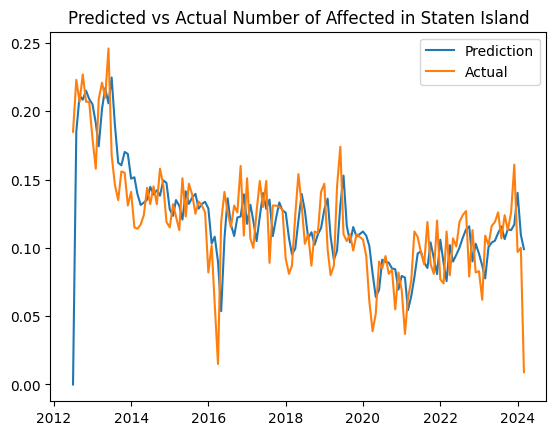

In [137]:
plt.plot(model.predict(dynamic=False))
plt.plot(statIsl_df['num_affected(thousands)'])
plt.legend(("Prediction","Actual"))
plt.title("Predicted vs Actual Number of Affected in Staten Island")

(array([19814., 19828., 19844., 19858., 19875., 19889., 19905., 19919.,
        19936.]),
 [Text(19814.0, 0, '2024-04-01'),
  Text(19828.0, 0, '2024-04-15'),
  Text(19844.0, 0, '2024-05-01'),
  Text(19858.0, 0, '2024-05-15'),
  Text(19875.0, 0, '2024-06-01'),
  Text(19889.0, 0, '2024-06-15'),
  Text(19905.0, 0, '2024-07-01'),
  Text(19919.0, 0, '2024-07-15'),
  Text(19936.0, 0, '2024-08-01')])

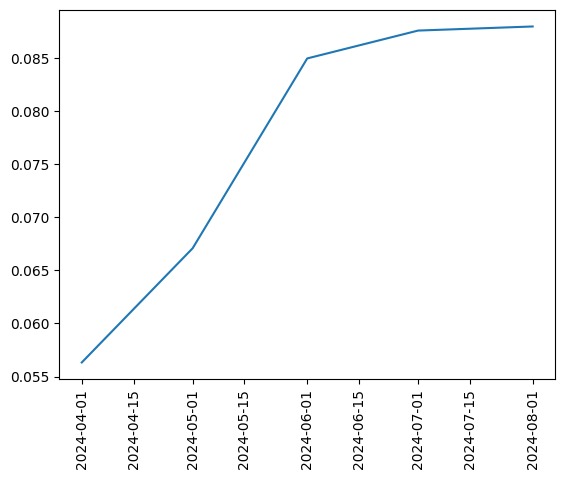

In [138]:
plt.plot(model.forecast(5,True))
plt.xticks(rotation=90)